<a href="https://colab.research.google.com/github/gachet/000mis-colabs/blob/master/soluciones_minimos_cuad_prob_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 8.- Un investigador informa sobre los datos tabulados a continuación de un experimento para determinar la tasa de crecimiento de bacterias $k$ (por día), como función de la concentración de oxígeno $c$ (mg/L). Se sabe que dichos datos pueden modelarse por medio de la ecuación siguiente $$ k = \frac{k_{max}*c^{2}}{c_{s}+c^{2}}$$ donde $c_s$ y $k_{max}$ son parámetros. Use una transformación para hacer lineal esta ecuación. Después utilice regresión lineal para estimar $c_s$ y $k_{max}$, y pronostique la tasa de crecimiento para $c = 2 mg/L$.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

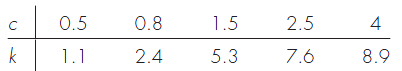

In [0]:
from IPython.display import Image
Image(filename="tablas/ocho.png")

### Linealizamos con $\frac{1}{k}=\frac{c^{2}+c_{s}}{k_{max}c^{2}}=\frac{1}{k_{max}}+\frac{c_{s}}{k_{max}}\frac{1}{c^{2}}$

#### Ecuación Lineal $v =\alpha u + \beta $  con <br><br>$v = \frac{1}{k} \,\,\, \alpha=\frac{c_{s}}{k_{max}}\,\,\, u = \frac{1}{c^{2}} \,\,\, \beta = \frac {1}{k_{max}}\,\,\, $

In [0]:
x_orig = np.array([0.5,0.8,1.5,2.5,4])
y_orig = np.array([1.1,2.4,5.3,7.6,8.9])
x = x_orig.reshape(-1,1)
y = y_orig.reshape(-1,1)
unos = np.ones(len(x))
unos = unos.reshape(-1,1)
for i in range(0,len(x)):
    print('%2.3f\t\t\t'%(x[i]),'%4.3f'%(y[i]))

0.500			 1.100
0.800			 2.400
1.500			 5.300
2.500			 7.600
4.000			 8.900


In [0]:
u = 1./(x**2)
A = A = np.column_stack((u,np.ones(len(x))))
print('Matriz A \n',A)

Matriz A 
 [[4.         1.        ]
 [1.5625     1.        ]
 [0.44444444 1.        ]
 [0.16       1.        ]
 [0.0625     1.        ]]


In [0]:
v = 1./y
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,v))
alfa = c[0]
beta = c[1]
print('Coeficientes  \u03B1 y \u03B2 \n',alfa,beta)
k_max = 1.0/beta
c_s = k_max * alfa
print('Coeficientes  k_max y c_s son  \n',k_max,c_s)

Coeficientes  α y β 
 [0.20248899] [0.09939628]
Coeficientes  k_max y c_s son  
 [10.06073855] [2.03718878]


### ecuación $ k = \frac{10.060738*c^{2}}{2.03718+c^{2}}$

In [0]:
y_calc = (k_max * x**2)/(c_s+x**2)
print('vector y_calc es\n',y_calc)

vector y_calc es
 [[1.09968388]
 [2.40508727]
 [5.28007113]
 [7.5875689 ]
 [8.92444043]]


In [0]:
suma_cuad_err= np.sum((y-y_calc)**2)
suma_cuad_err         

0.0011750066540658181

### Como medida de la bondad del ajuste utilizamos el coeficiente de determinación definido por:
$$
R^{2}=\frac{\displaystyle\sum_{i=1}^{m}\left(\hat{y_{i}}-\bar{y}\right)^{2}}{\displaystyle\sum_{i=1}^{m}\left(y_{i}-\bar{y}\right)^{2}}
$$

In [0]:

v=1./y
v_calc= alfa*u+beta
R2 = np.sum((v_calc-np.mean(v))**2)/np.sum((v-np.mean(v))**2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9999966607920293


In [0]:
## Para c = 2 
k_2 = (k_max * 2**2)/(c_s+2**2)
print('para c = 2 k es ', float(k_2))


para c = 2 k es  6.665843263968141


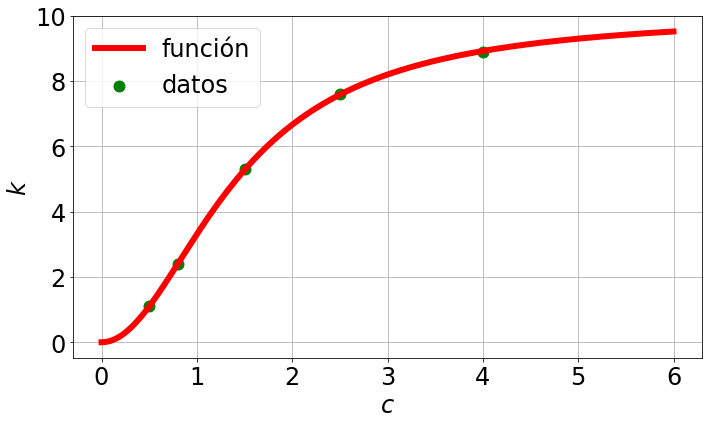

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
##bottom, top = 0.,5000000  # return the current ylim
##plt.ylim((bottom, top))   # set the ylim to bottom, top
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
x_nuevo = np.arange(0,6,0.001)
y_calc_nuevo = (k_max*x_nuevo**2)/(c_s+x_nuevo**2)
plt.plot(x_nuevo,y_calc_nuevo,c='red',linewidth=6,label='función',zorder=4)
plt.xlabel('$c$',fontsize=24)
plt.ylabel('$k$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left',fontsize=24)
plt.tight_layout()
plt.show()



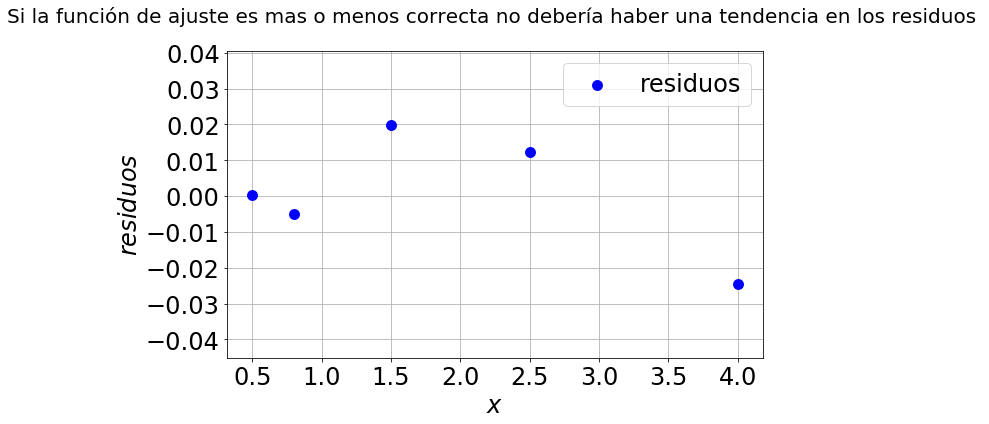

In [0]:
## plot errors to look for trend
######### Now generate plot
plt.figure(figsize = (12,6) )
plt.grid(True)
#bottom, top = -0.00002,0.00002  # return the current ylim
#plt.ylim((bottom, top))   # set the ylim to bottom, top
# plot data as scatter plot,
plt.title('Si la función de ajuste es mas o menos correcta no debería haber una tendencia en los residuos \n',fontsize=20)
# these are the error or residuals in y values
errores = y-y_calc
plt.scatter(x,errores,s=120,c='blue',linewidth=0,label='residuos',zorder=2)
plt.xlabel('$x$',fontsize=24)
plt.ylabel('$residuos$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()